In [40]:
from gensim.models import word2vec
import nltk
import numpy as np
import re

import matplotlib.pyplot as plt

In [12]:
wpt = nltk.WordPunctTokenizer()
stop_words = nltk.corpus.stopwords.words('english')

def normalize_document(doc):
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A)
    doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    tokens = wpt.tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

normalize_corpus = np.vectorize(normalize_document)

In [15]:
from nltk.corpus import gutenberg
from string import punctuation

bible = gutenberg.sents('bible-kjv.txt') 
remove_terms = punctuation + '0123456789'

norm_bible = [[word.lower() for word in sent if word not in remove_terms] for sent in bible]
norm_bible = [' '.join(tok_sent) for tok_sent in norm_bible]
norm_bible = filter(None, normalize_corpus(norm_bible))
norm_bible = [tok_sent for tok_sent in norm_bible if len(tok_sent.split()) > 2]

print('Total lines:', len(bible))
print('\nSample line:', bible[10])
print('\nProcessed line:', norm_bible[10])

Total lines: 30103

Sample line: ['1', ':', '6', 'And', 'God', 'said', ',', 'Let', 'there', 'be', 'a', 'firmament', 'in', 'the', 'midst', 'of', 'the', 'waters', ',', 'and', 'let', 'it', 'divide', 'the', 'waters', 'from', 'the', 'waters', '.']

Processed line: god said let firmament midst waters let divide waters waters


In [46]:
from gensim.models import word2vec

# tokenize sentences in corpus
wpt = nltk.WordPunctTokenizer()
tokenized_corpus = [wpt.tokenize(document) for document in norm_bible]

# Set values for various parameters
feature_size = 100    # Word vector dimensionality  
window_context = 30          # Context window size                                                                                    
min_word_count = 1   # Minimum word count                        
sample = 1e-3   # Downsample setting for frequent words

w2v_model = word2vec.Word2Vec(tokenized_corpus, size=feature_size, 
                          window=window_context, min_count=min_word_count,
                          sample=sample, iter=50)

# view similar words based on gensim's model
similar_words = {search_term: [item[0] for item in w2v_model.wv.most_similar([search_term], topn=5)]
                  for search_term in ['god', 'jesus', 'noah', 'egypt', 'john', 'gospel', 'moses','famine']}
similar_words

{'egypt': ['egyptians', 'pharaoh', 'bondage', 'flowing', 'rid'],
 'famine': ['pestilence', 'peril', 'sword', 'blasting', 'mildew'],
 'god': ['lord', 'worldly', 'reasonable', 'promised', 'godly'],
 'gospel': ['christ', 'faith', 'preach', 'godly', 'hope'],
 'jesus': ['peter', 'messias', 'nathanael', 'james', 'immediately'],
 'john': ['baptist', 'james', 'galilee', 'tetrarch', 'peter'],
 'moses': ['children', 'congregation', 'joshua', 'aaron', 'doctor'],
 'noah': ['ham', 'shem', 'japheth', 'henoch', 'kenan']}

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


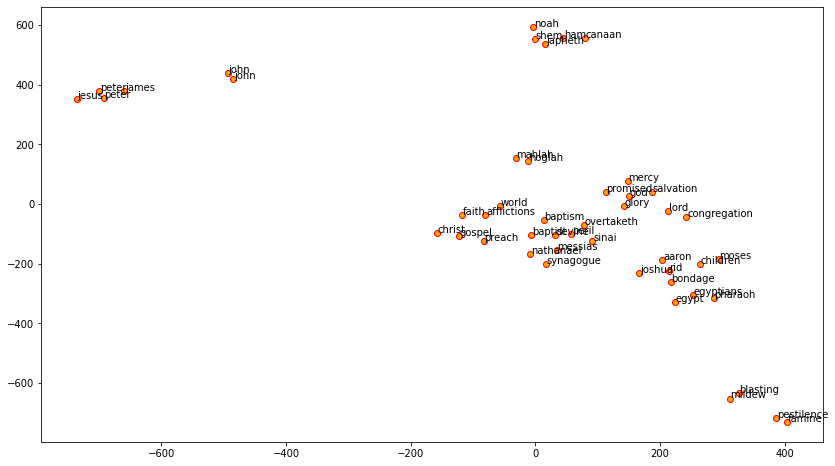

In [47]:
# words = sum([[k] + v for k, v in similiar_words.items()], [])
# wvs = w2v_model.wv[words]

# tsne = TSNE(n_components=2, random_state=0, n_iter=10000, perplexity=2)

# np.set_printoptions(suppress=True)
# T = tsne.fit_transform(wvs)

# labels=words

# plt.figure(figsize=(14, 8))
# plt.scatter(T[:, 0], T[:, 1], c="orange", edgecolors='r')

# for label, x, y in zip(labels, T[:, 0], T[:, 1]):
#     plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')


from sklearn.manifold import TSNE

words = sum([[k] + v for k, v in similiar_words.items()], [])
wvs = w2v_model.wv[words]

tsne = TSNE(n_components=2, random_state=0, n_iter=10000, perplexity=2)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(wvs)
labels = words

plt.figure(figsize=(14, 8))
plt.scatter(T[:, 0], T[:, 1], c='orange', edgecolors='r')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')